<h1><b>Travel Insurance</b></h1>

<h2><b>Business Problem Understanding.</b></h2>

<h4><b>Context</b></h4>
Agen asuransi perjalanan berupaya untuk memitigasi risiko keuangan yang terkait dengan klaim pelanggan, dengan menekankan manajemen risiko proaktif. Dengan memprediksi kemungkinan nasabah untuk mengajukan klaim asuransi, lembaga dapat mengalokasikan sumber daya secara strategis, sehingga meningkatkan kemampuan mereka untuk menangani potensi klaim secara efisien. Pada saat yang sama, melihat pola di antara pelanggan yang tidak melakukan klaim asuransi akan memfasilitasi pengembangan strategi retensi yang ditargetkan, sehingga mendorong loyalitas dan keterlibatan pelanggan. Pendekatan ganda ini tidak hanya menjaga stabilitas keuangan agensi tetapi juga membina hubungan pelanggan yang langgeng, mendukung kesuksesan jangka panjang dan keberlanjutan dalam lanskap asuransi yang kompetitif.

Target kolom Claim:

0: Tidak berhak menerima claim.\
1: Berhak menerima claim.

<h4><b>Problem Statement</b></h4>

Agen asuransi perjalanan berupaya memprediksi apakah pelanggan kemungkinan akan mengklaim asuransi atau tidak berdasarkan berbagai atribut pelanggan dan rincian polis. Prediksi ini dapat membantu dalam mengalokasikan sumber daya secara efisien, meningkatkan kepuasan pelanggan, dan mengoptimalkan operasional bisnis.

<h4><b>Goals</b></h4>

Tujuan utama dari proyek ini adalah untuk mengembangkan model prediktif yang kuat yang mampu secara akurat mengklasifikasikan pelanggan ke dalam kategori klaim dan non-klaim sekaligus mengidentifikasi faktor-faktor penting yang mempengaruhi status klaim untuk memberikan wawasan yang dapat ditindaklanjuti kepada agensi. Dengan mengoptimalkan alokasi sumber daya dan berfokus pada pelanggan yang memiliki kemungkinan lebih tinggi untuk mengklaim asuransi, lembaga ini dapat mengelola risiko secara efektif dan meningkatkan efisiensi operasional. Selain itu, memanfaatkan prediksi probabilitas klaim memungkinkan penyesuaian layanan dan komunikasi, sehingga meningkatkan pengalaman pelanggan secara keseluruhan dan membina hubungan yang lebih kuat antara agensi dan kliennya.

<h4><b>Analytic Approach</b></h4>

1. Data Preparation: Membersihkan dan memproses data terlebih dahulu, menangani <i>missing value</i>, dan <i>encoding variable</i>.
2. Exploratory Data Analysis (EDA): Menganalisis distribusi fitur/kolom, mengidentifikasi korelasi, dan memvisualisasikan pola untuk mendapatkan wawasan tentang data.
3. Feature Engineering: Membuat fitur baru atau mengubah fitur yang sudah ada untuk meningkatkan performa model.
4. Model Selection: Bereksperimen dengan berbagai algoritma klasifikasi seperti logistic regression, decision tree, random forest, atau gradient boosting untuk mengidentifikasi model dengan kinerja terbaik.
5. Model Evaluation: Menilai kinerja model menggunakan metrik yang sesuai seperti accuracy, precision, recall, dan f1-score.
6. Interpretation and Insight: Menginterpretasi hasil model untuk memahami faktor-faktor yang berkontribusi terhadap kemungkinan klaim dan memberikan wawasan yang dapat ditindaklanjuti kepada agensi.


<h4><b>Metrics Evaluation</b></h4>
![metric 3.png](<attachment:metric 3.png>)

- True Positive (TP): Memprediksi klaim dengan benar.
- False Positive (FP): Salah memprediksi klaim ( Type I Error ).
- True Negative (TN): Memprediksi tidak ada klaim dengan benar.
- False Negative (FN): Salah memprediksi tidak ada klaim ( Type II Error ).

1. Type I Error (False Positive):
- Occurs when the model incorrectly predicts a claim when there is none.
- Implication: Resources may be allocated unnecessarily to handle claims that do not materialize, leading to potential inefficiencies and increased operational costs.
2. Type II Error (False Negative):
- Terjadi ketika model salah memprediksi tidak ada klaim padahal sebenarnya ada klaim.
- Implikasi: Perusahaan asuransi mungkin tidak siap menghadapi klaim aktual, yang menyebabkan potensi tekanan keuangan dan keterlambatan pemrosesan klaim, yang dapat berdampak negatif pada kepuasan pelanggan.

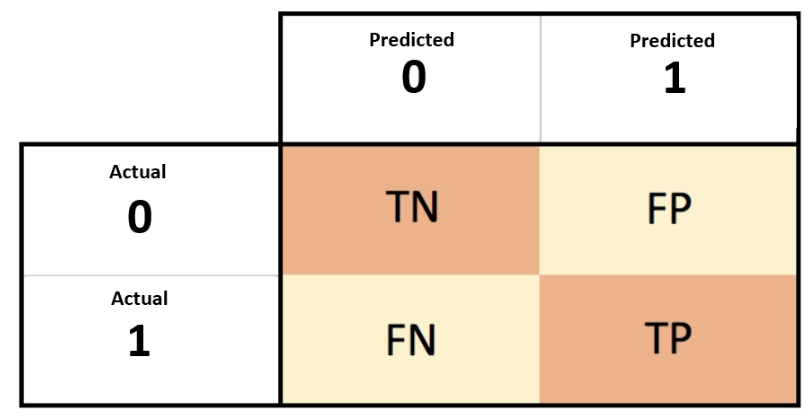

<h2><b>Data Understanding</b></h2>

Dataset Source: https://drive.google.com/drive/folders/1iVx5k6tWglqfHb05o0DElg8JHg7VVG_J

<h4><b>Context</b></h4>

Asuransi perjalanan merupakan salah satu jenis asuransi yang memberikan perlindungan selama kita melakukan perjalanan baik dalam negeri maupun luar negeri. Bahkan beberapa negara sudah mewajibkan pelancong untuk memiliki asuransi perjalanan, misalnya saja negara-negara di Eropa dan Amerika. Besaran premi tergantung pada pertanggungan yang diinginkan, lama perjalanan, dan tujuan perjalanan. Sebuah perusahaan yang bergerak di bidang asuransi perjalanan ingin mengetahui pemegang polis yang akan mengajukan klaim asuransi untuk pertanggungan. Data pemegang polis pada perusahaan asuransi merupakan data historis yang terdiri dari destinasi, produk asuransi, dan lain sebagainya.

<h4><b>Features</b></h4>

| Attribute | Description |
| --- | --- |
| Agency | Name of Agency |
| Agency Type | Type of Travel Insurance Agencies |
| Distribution Channel | Channel of Travel Insurance Agencies |
| Product Name | Name of The Travel Insurance Products |
| Gender | Gender of Insured |
| Duration | Duration of Travel |
| Destination | Destination of Travel |
| Net Sales | Amount of Sales of Travel Insurance Policies |
| Commision (In Value) | Commision Received for Travel Insurance Agency |
| Age | Age of Insured |
| Claim | Claim Status |

<h2><b>Exploratory Data Analysis</b></h2>

In [ ]:
# Library.

import pandas as pd
import numpy as np

# Visualization.

import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Dataset.

df = pd.read_csv('data_travel_insurance.csv')

df.head()

In [ ]:
# Jumlah dan Tipe Data Untuk Setiap Kolom.

df.info()

In [ ]:
df.describe()

In [ ]:
df.describe(include='object')

In [ ]:
# Melihat Data Secara Detail
pd.set_option('display.max_colwidth', None)

pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

In [ ]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

Melihat visual di atas kita dapat mengetahui bahwa hanya ada satu kolom saja yang memiliki missing value, yaitu kolom <b>Gender</b>.

In [ ]:
missingno.matrix(df, figsize=(10,5), fontsize=12)
plt.show()

Melihat visual di atas kita dapat mengetahui bahwa missing value di kolom <b>Gender</b> terjadi secara acak tanpa ada nya pola.

In [ ]:
# Distribution of the target variable
sns.countplot(x='Claim', data=df)
plt.title('Distribution of Claim')
plt.show()

Melihat visual di atas kita dapat mengetahui bahwa kolom/feature target yaitu kolom <b>Claim</b> terdistribusi tidak seimbang atau imbalance.

In [ ]:
# Plot distribusi fitur numerik.
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(28, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

<b>Insight</b>

- Keempat distribusi menunjukkan kemiringan ke kanan, yang berarti mayoritas nilai berada di sisi kiri (lebih rendah) dari distribusi dengan ekor panjang ke kanan (lebih tinggi).
- Fenomena ini umum terjadi dalam data yang memiliki banyak kejadian dengan nilai rendah dan sedikit kejadian dengan nilai sangat tinggi, seringkali disebabkan oleh outlier atau kejadian ekstrim.
- Untuk analisis lebih lanjut, perlu dilakukan penanganan terhadap outlier.

In [ ]:
# Daftar kolom yang akan dipetakan, tidak termasuk 'Destination'.
columns = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Gender']

# Menyiapkan figure matplotlib.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(28, 18))
fig.suptitle('Distribution of Categorical Features', fontsize=20)

# Menggabungkan array axes untuk iterasi yang mudah.
axes = axes.flatten()

# Membuat count plot untuk setiap kolom.
for i, col in enumerate(columns):
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis", ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

    # Menambahkan count anotasi.
    for p in axes[i].patches:
        width = p.get_width()
        axes[i].annotate(f'{int(width)}', 
                         (width, p.get_y() + p.get_height() / 2), 
                         ha = 'left', va = 'center', 
                         xytext = (5, 0), 
                         textcoords = 'offset points')

# Membuat plot untuk 10 Destinasi teratas dan 10 Destinasi terbawah.
destination_counts = df['Destination'].value_counts()
top_10_destinations = destination_counts.head(10)
bottom_10_destinations = destination_counts.tail(10)

# Gabungkan 10 Destinasi teratas dan 10 Destinasi terbawah ke dalam satu DataFrame.
filtered_destinations = pd.concat([top_10_destinations, bottom_10_destinations])

# Buat plot untuk Destinasi yang difilter.
sns.countplot(data=df[df['Destination'].isin(filtered_destinations.index)], 
              y='Destination', 
              order=filtered_destinations.index, 
              palette="viridis", 
              ax=axes[-1])
axes[-1].set_title('Distribution of Top 10 and Bottom 10 Destinations')
axes[-1].set_xlabel('Count')
axes[-1].set_ylabel('Destination')

# Menambahkan count anotasi.
for p in axes[-1].patches:
    width = p.get_width()
    axes[-1].annotate(f'{int(width)}', 
                      (width, p.get_y() + p.get_height() / 2), 
                      ha = 'left', va = 'center', 
                      xytext = (5, 0), 
                      textcoords = 'offset points')

# Menyesuaikan tata letak.
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Visual di atas menunjukan persebaran data dalam kolom/feature kategorical.

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = df.corr(method='spearman')

# Plot matriks korelasi.
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Visual di atas menunjukan bahwa tidak ada hubungan atau korelasi yang kuat antara kolom/feature numerical.

In [ ]:
# # Pairplot for numerical features
# sns.pairplot(df, hue='Claim', diag_kind='kde')
# plt.show()

In [ ]:
# # Relationship between numerical features and the target
# for feature in numerical_features:
#     plt.figure(figsize=(20, 4))
#     sns.boxplot(x='Claim', y=feature, data=df)
#     plt.title(f'{feature} vs Claim')
#     plt.show()

# # Relationship between categorical features and the target
# categorical_features = df.select_dtypes(include=['object']).columns

# for feature in categorical_features:
#     plt.figure(figsize=(20, 4))
#     sns.countplot(x=feature, hue='Claim', data=df)
#     plt.title(f'{feature} vs Claim')
#     plt.show()

<h4><b>Data Cleaning</b><h4>

<b>Missing Values</b>

In [ ]:
pd.set_option('display.max_colwidth', None)

nul_val = pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    # 'null': df.isna().sum().values,
    'null_value(%)': df.isna().mean().values * 100}
).round(3)

print(df.shape)
nul_val

In [ ]:
# Mengidentifikasi baris dengan nilai null di kolom 'Gender'.
null_gender = df[df['Gender'].isnull()]

print(f"Number of rows with null 'Gender': {len(null_gender)}")

Dari data di atas kita dapat melihat bahwa yang terdapat <i>missing values</i> hanya kolom <b>'Gender'</b> Saja.

In [ ]:
# Menghapus kolom 'Gender'.
df.drop("Gender", axis='columns', inplace=True)

Karena 70% data kolom <b>'Gender'</b> hilang, maka penghapusan kolom tersebut dapat dibenarkan karena alasan berikut:

- Tingginya proporsi data yang hilang dapat menurunkan kualitas kumpulan data.
- Potensi bias yang disebabkan oleh imputasi.
- Dampak terbatas pada kinerja prediktif jika fitur tersebut tidak terlalu berpengaruh.
- Penyederhanaan kumpulan data untuk performa dan interpretasi model yang lebih baik.

Menghapus kolom Gender dapat menghasilkan kumpulan data yang lebih kuat dan bersih, yang pada akhirnya meningkatkan efisiensi dan keandalan model prediktif.

In [ ]:
df.head()

<b>Negative Values</b>

In [ ]:
pd.set_option('display.max_colwidth', None)

neg_val = pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns]}
).round(3)
print(df.shape)
neg_val

In [ ]:
# Mengidentifikasi baris dengan nilai negatif di kolom 'Duration' dan 'Net Sales'.
negative_duration = df[df['Duration'] < 0]
negative_net_sales = df[df['Net Sales'] < 0]

print(f"Number of rows with negative 'Duration': {len(negative_duration)}")
print(f"Number of rows with negative 'Net Sales': {len(negative_net_sales)}")

Dari data di atas kita dapat melihat bahwa yang terdapat <i>negative values</i> ada pada kolom <b>Duration</b> dan <b>Net Sales</b>.

In [ ]:
# Menghapus baris dengan nilai negatif di kolom 'Duration' dan 'Net Sales'
df = df[(df['Duration'] >= 0) & (df['Net Sales'] >= 0)]

Alasan untuk menghapus <i>negative values</i> adalah:

1. Data Tidak Valid:
- Untuk kolom <b>Duration</b>, nilai negatif kemungkinan besar tidak valid karena durasi tidak boleh negatif. Hal ini menandakan adanya kesalahan dalam pemasukan atau pencatatan data.
- Untuk kolom <b>Net Sales</b>, meskipun ada skenario di mana pengembalian dana atau pengembalian dicatat sebagai nilai negatif, hal ini harus ditangani secara terpisah dan tidak disertakan dalam data penjualan umum.
2. Dampak pada Analisis:
- Memasukkan nilai negatif dalam analisis dan pemodelan dapat menyebabkan wawasan yang salah dan memengaruhi performa model prediktif.
3. Kualitas data:
- Memastikan kualitas data dengan menghapus entri yang tidak valid membantu menjaga integritas kumpulan data dan meningkatkan keandalan hasilnya.

In [ ]:
# Mengidentifikasi baris dengan nilai negatif di kolom 'Duration' dan 'Net Sales'.
negative_duration = df[df['Duration'] < 0]
negative_net_sales = df[df['Net Sales'] < 0]

print(f"Number of rows with negative 'Duration': {len(negative_duration)}")
print(f"Number of rows with negative 'Net Sales': {len(negative_net_sales)}")

<b>Zero Values</b>

In [ ]:
pd.set_option('display.max_colwidth', None)

zero_val = pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns]}
).round(3)
print(df.shape)
zero_val

In [ ]:
# Mengidentifikasi baris dengan nilai 0 di kolom 'Duration', 'Net Sales', 'Commision (in value)', dan 'Age'. 
zero_duration = df[df['Duration'] == 0]
zero_net_sales = df[df['Net Sales'] == 0]
zero_commision = df[df['Commision (in value)'] == 0]
zero_age = df[df['Age'] == 0]

print(f"Number of rows with zero 'Duration': {len(zero_duration)}")
print(f"Number of rows with zero 'Net Sales': {len(zero_net_sales)}")
print(f"Number of rows with zero 'Commision (in values)': {len(zero_commision)}")
print(f"Number of rows with zero 'Age': {len(zero_age)}")

Dari data di atas kita dapat melihat bahwa yang terdapat <i>zero values</i> ada pada kolom <b>Net Sales</b> dan <b>Commision (in value)</b>.

In [ ]:
# Filter baris dalam kolom 'Duration' dan 'Age' tidak sama dengan 0.
df = df[df['Duration'] != 0]
df = df[df['Age'] != 0]

# Menghapus kolom 'Net Sales' dan 'Commision (in value)'.
df.drop(columns=['Net Sales', 'Commision (in value)'], inplace=True)

In [ ]:
# Mengidentifikasi baris dengan nilai 0 di kolom 'Duration' dan 'Age'. 
zero_duration = df[df['Duration'] == 0]
zero_age = df[df['Age'] == 0]

print(f"Number of rows with zero 'Duration': {len(zero_duration)}")
print(f"Number of rows with zero 'Age': {len(zero_age)}")

Alasan untuk menghapus kolom <b>Net Sales</b> dan <b>Commision (in value)</b> adalah:

- Tidak Berkaitan Langsung: Informasi tentang <b>Net Sales</b> dan <b>Commision (in value)</b> mungkin tidak secara langsung memengaruhi keputusan klaim asuransi perjalanan.
- Risiko Overfitting: Menyertakan fitur-fitur yang tidak relevan dapat meningkatkan risiko overfitting, di mana model belajar dari "noise" yang tidak signifikan.
- Menyederhanakan Model: Menghapus kolom-kolom yang tidak diperlukan dapat menyederhanakan model prediksi, mempermudah interpretasi, dan meningkatkan kinerja.
- Fokus pada Fitur Penting: Fokus pada fitur-fitur yang lebih berdampak dalam memprediksi klaim asuransi dapat meningkatkan keakuratan model dan efisiensi penggunaan sumber daya.

Menghapus kolom-kolom ini dapat membantu memusatkan perhatian pada fitur-fitur yang lebih penting dan meningkatkan kinerja model dalam memprediksi klaim asuransi perjalanan.

In [ ]:
df.head()

<b>Duplicate Values</b>

In [ ]:
pd.set_option('display.max_colwidth', None)

dup_val = pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'duplicate' : df.duplicated().sum()}
).round(3)
print(df.shape)
dup_val

Terdapat 16.156 baris duplikat.

In [ ]:
# df.duplicated(keep='first').sum()

In [ ]:
df = df.drop_duplicates(keep='first').reset_index(drop=True)

df

Langsung saja saya drop duplikat nya.

<h4><b>Outliers Handling</b></h4>

<b>Duration</b>

In [ ]:
# Membuat box plot.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Duration')
plt.title('Box Plot of Duration')
plt.ylabel('Duration')
plt.show()

Dari visual di atas kita bisa melihat bahwa terdapat outlier di kolom <b>Duration</b>.

In [ ]:
df = df[df['Duration'] <= 365]

df

Saya Menghapus <i>values</i> dari kolom <b>Duration</b>, yang <i>values</i> nya melebihi batas waktu 1 tahun atau 365 hari dan yang tidak masuk akal seperti 4000 hari.

In [ ]:
# Menghitung quartiles dan IQR.
q1 = df['Duration'].quantile(0.25)
q3 = df['Duration'].quantile(0.75)
iqr = q3 - q1

# Mendefinisikan outliers bound.
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Mencari outliers.
outliers = df[(df['Duration'] < lower_bound) | (df['Duration'] > upper_bound)]

#  Median dari kolom 'Duration'.
median = df['Duration'].median()
outliers

Setelah itu saya mencari <i>outliers</i> dengan menggunakan rumus IQR (Inter Quartile Range).

In [ ]:
# Merubah outliers kolom 'Duration' dengan median nya.
df['Duration'] = df['Duration'].where((df['Duration'] >= lower_bound) & (df['Duration'] <= upper_bound), median)

df.head()

Setelah mendapatkan <i>outliers</i> nya, saya mengganti <i>outliers</i> dengan nilai median dari kolom <b>Duration</b>.

<b>Age</b>

In [ ]:
# Membuat box plot.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Age')
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

Dari visual di atas kita bisa melihat bahwa terdapat outlier di kolom <b>Age</b>.

In [ ]:
# Menhapus outliers yang tidak masuk akal.
df = df[df['Age'] <= 85]

df

In [ ]:
df['Age'].unique()

Menurut World Health Organization (WHO), rentang harapan hidup manusia sekitar umur 85 tahun. Jadi saya Menghapus <i>values</i> dari kolom <b>Age</b>, yang <i>values</i> nya melebihi umur 85 tahun.

In [ ]:
# Menghitung quartiles dan IQR.
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1

# Mendefinisikan outliers bound.
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Mencari outliers.
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

#  Median dari kolom 'Age'. 
median_age = df['Age'].median()
outliers

Setelah itu saya mencari <i>outliers</i> dengan menggunakan rumus IQR (Inter Quartile Range).

In [ ]:
# Merubah outliers kolom 'Age' dengan median nya.
df['Age'] = df['Age'].where((df['Age'] >= lower_bound) & (df['Age'] <= upper_bound), median)

df.head()

Setelah mendapatkan <i>outliers</i> nya, saya mengganti <i>outliers</i> dengan nilai median dari kolom <b>Age</b>.

<h4><b>Data Analysis</b></h4>

In [ ]:
# Mengganti 'Yes' dengan 1 dan 'No' dengan 0 di kolom 'Claim'.
df['Claim'] = df['Claim'].replace({'Yes': 1, 'No': 0})

# Melihat apakah sudah berubah.
print(df['Claim'].unique())

In [ ]:
df.head()

Saya merubah value dari kolom/feature target yaitu kolom <b>Claim</b>.

In [ ]:
df.info()

In [ ]:
# Membuat count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Claim', data=df)

# Menganotasi setiap bar dengan count.
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Distribution of Claim')
plt.xlabel('Claim')
plt.ylabel('Count')
plt.show()

Melihat distribusi kolom/feature target. 

In [ ]:
# Membuat box plot.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Claim', y='Duration', data=df)
plt.title('Box Plot of Duration vs Claim')
plt.xlabel('Claim')
plt.ylabel('Duration')
plt.show()

Melihat distribusi kolom/feature target dengan kolom <b>Duration</b>.

In [ ]:
# Membuat box plot. 
plt.figure(figsize=(8, 6))
sns.boxplot(x='Claim', y='Age', data=df)
plt.title('Box Plot of Duration vs Claim')
plt.xlabel('Claim')
plt.ylabel('Age')
plt.show()

Melihat distribusi kolom/feature target dengan kolom <b>Age</b>.

In [ ]:
# menghitung nilai 10 teratas dan 10 terbawah pada kolom "Destination".
top_destinations = df['Destination'].value_counts().nlargest(10).index
bottom_destinations = df['Destination'].value_counts().nsmallest(10).index

# Filter data untuk menampilkan hanya top dan bottom kolom 'Destination'.
filtered_data = df[df['Destination'].isin(top_destinations) | df['Destination'].isin(bottom_destinations)]

# Membuat subplots untuk setiap kolom categorical.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))

# Flatten axes untuk memudahkan iterasi.
axes = axes.flatten()

#  Loop setiap kolom Categories dan buat count plot secara horizontal.
categorical_columns = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']
for i, column in enumerate(categorical_columns):
    sns.countplot(y=column, hue='Claim', data=filtered_data, ax=axes[i])
    axes[i].set_title(f'Claim vs {column}')
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('Count')
    
    # menganotasi setiap bar dengan count.
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                         xytext=(5, 0), textcoords='offset points', ha='left', va='center')

    # Memindahkan legend ke pojok kanan bawah.
    axes[i].legend(title='Claim', loc='lower right')

# Menghilangkan sub plot kosong.
fig.delaxes(axes[-1])

# Menyesuaikan tampilan.
plt.tight_layout()
plt.show()

Melihat distribusi kolom/feature target dengan kolom <b>Agency</b>, <b>Agency Type</b>, <b>Distribution Channel</b>, <b>Product Name</b>, dan <b>Destination</b>.

<h2><b>Features Enginering</b></h2>

<h4><b>Features Creation<b></h4>

<b>Age</b>

In [ ]:
# Melihat nilai unik dalam kolom 'Age'.
df['Age'].unique()

In [ ]:
# Mendefinisikan bins dan labels untuk kategori umur.
bins = [5, 13, 20, 40, 60, float('inf')]
labels = ['Child', 'Teen', 'Young Adult', 'Middle Age Adult', 'Senior Adult']

# Membuat kolom 'Age Categories'.
df['Age Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Menampilkan dataframe.
df.head()

In [ ]:
# Menghapus kolom 'Age'.
df.drop("Age", axis='columns', inplace=True)

# Mengubah nama kolom "Age Category" menjadi "Age".
df.rename(columns={'Age Category': 'Age'}, inplace=True)

# Menampilkan dataframe.
df.head()

<b>Duration</b>

In [ ]:
# Melihat nilai unik dalam kolom 'Duration'.
df['Duration'].unique()

In [ ]:
# Mendefinisikan bins dan labels untuk kategori Duration.
bin_boundaries = list(range(0, df['Duration'].max() + 31, 30))

# Tentukan label untuk bin-bin.
bin_labels = [f"Month {i}" for i in range(1, len(bin_boundaries))]

# Membuat kolom 'Month'.
df['Month'] = pd.cut(df['Duration'], bins=bin_boundaries, labels=bin_labels, include_lowest=True)

# Melihat Dataframe.
df.head()

In [ ]:
# Menghapus kolom 'Duration'.
df.drop("Duration", axis='columns', inplace=True)

# Mengubah nama kolom "Month" menjadi "Duration".
df.rename(columns={'Month': 'Duration'}, inplace=True)

# Menampilkan dataframe.
df.head()

In [ ]:
df['Duration'].unique()

<h2><b>Create Model</b></h2>

<h4><b>Split Data</b></h4>

In [ ]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 10

# Split dataset.
df_seen, df_unseen = train_test_split(df, stratify=df['Claim'], test_size = 0.2, random_state = RANDOM_STATE)

<h4><b>Pipeline</b></h4>

In [ ]:
from pycaret.internal.preprocess.transformers import TransformerWrapper
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from pycaret.internal.preprocess.transformers import FixImbalancer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss

In [ ]:
mapping1 = [{'col': 'Age',
            'mapping': {'Child': 0, 
                        'Teen': 1, 
                        'Young Adult': 2,
                        'Middle Age Adult': 3, 
                        'Senior Adult': 4}
}]
mapping2 = [{'col':'Duration',
            'mapping': {'Month 1': 0, 
                        'Month 2': 1, 
                        'Month 3': 2,
                        'Month 4': 3, 
                        'Month 5': 4}
}]

pipeline = [
    ('ordinal', TransformerWrapper(
        include = ['Age'],
        transformer = OrdinalEncoder(mapping = mapping1))),
    ('ordinal1', TransformerWrapper(
        include = ['Duration'],
        transformer = OrdinalEncoder(mapping = mapping2))),
    ('onehot', TransformerWrapper(
        include = ['Agency', 'Agency Type', 'Distribution Channel'],
        transformer = OneHotEncoder(drop = 'first'))),
    ('binary', TransformerWrapper(
        include = ['Product Name', 'Destination'],
        transformer = BinaryEncoder()))
]



from pycaret.classification import *

configs={
    # general setup
    'data':df_seen, 
    'target':'Claim',
    'train_size':0.8,
    'verbose':False,
    'session_id':RANDOM_STATE, 

    # data pre-processing
    'preprocess':None,
    'custom_pipeline_position':0,
}



1. Ordinal: Mengubah kolom/feature <b>Age</b> dan <b>Duration</b> menggunakan Ordinal Encoding karena fitur ini memiliki urutan.
2. Onehot: Mengubah kolom/feature <b>Agency</b>, <b>Agency Type</b>, dan <b>Distribution Channel</b> menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
3. Binary: Mengubah kolom/features <b>Product Name</b> dan <b>Destination</b> menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.

<h4><b>Experiment<b></h4>

<b>Experiment 1</b>

In [ ]:
exp1 = ClassificationExperiment()
exp1.setup(custom_pipeline=pipeline,**configs)
exp1.get_config('pipeline')

In [ ]:
base1 = exp1.compare_models(sort='Recall')

In [ ]:
exp1.tune_model(base1, optimize='Recall')

<b>Experiment 2</b>

In [ ]:
exp2 = ClassificationExperiment()
exp2.setup(custom_pipeline=pipeline + [('over sampling', TransformerWrapper(
    transformer=FixImbalancer(RandomOverSampler(random_state=42))
))],**configs)
exp2.get_config('pipeline')

In [ ]:
base2 = exp2.compare_models(sort='Recall')

In [ ]:
base2_tune = exp2.tune_model(base2, optimize='Recall')

In [ ]:
# base2 = exp2.compare_models(sort='Recall', probability_threshold=0.5)

<b>Experiment 3</b>

In [ ]:
exp3 = ClassificationExperiment()
exp3.setup(custom_pipeline=pipeline + [('resampling', TransformerWrapper(
    transformer=FixImbalancer(SMOTE())
))],**configs)
exp3.get_config('pipeline')

In [ ]:
base3 = exp3.compare_models(sort='Recall')

In [ ]:
base3_tune = exp3.tune_model(base3, optimize='Recall')

<b>Experiment 4</b>

In [ ]:
exp4 = ClassificationExperiment()
exp4.setup(custom_pipeline=pipeline + [('resampling', TransformerWrapper(
    transformer=FixImbalancer(NearMiss(version=3))
))],**configs)
exp4.get_config('pipeline')

In [ ]:
base4 = exp4.compare_models(sort='Recall')

In [ ]:
base4_tune = exp4.tune_model(base4, optimize='Recall')

<h2><b>Evaluasi Model</b></h2>

<h4><b>Grafik ROC AUC</b></h4>

In [ ]:
exp4.plot_model(base4_tune,plot='auc')

Insight:
- AUC Kelas 0 dan Kelas 1 (0,80): Pengklasifikasi efektif dalam membedakan kedua kelas, dengan tingkat positif benar yang tinggi dan tingkat positif palsu yang relatif rendah.
- AUC rata-rata mikro (0,64): Meskipun pengklasifikasi berkinerja baik untuk masing-masing kelas, kinerja keseluruhan dengan mempertimbangkan semua instance adalah moderat, sehingga menunjukkan adanya ruang untuk perbaikan.
- AUC rata-rata makro (0,80): Rata-rata, pengklasifikasi menangani setiap kelas dengan baik, menunjukkan kinerja yang seimbang di seluruh kelas


<h4><b>Calibration</b></h4>

In [ ]:
exp4.plot_model(base4_tune, plot='calibration')

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_mod = exp4.calibrate_model(estimator=base4_tune, method='isotonic')

exp4.plot_model(calibrated_mod, plot='calibration')

1. Baik:
- Semakin dekat garis biru ke garis diagonal putus-putus, semakin baik kalibrasinya.
- Probabilitas Rendah (0,0-0,2): Kalibrasi baik, prediksi akurat.
2. Buruk:
- Probabilitas Jangka Menengah (0,2-0,6): Kalibrasi buruk, prediksi tidak akurat.
- Probabilitas Tinggi (0,6-1,0): Kalibrasi tidak konsisten, prediksi tidak akurat.

Kesimpulan: Kalibrasi model perlu diperbaiki, terutama untuk probabilitas menengah dan tinggi.


<h2><b>Menyimpan Final Model</b></h2>

In [ ]:
# final_model = exp4.finalize_model(calibrate_model)

In [ ]:
# Saving Model.
# exp4.save_model(final_model,'../Model/Deployment/26052024')

<h2><b>Interpretasi Model</b></h2>

<h4><b>Cara Kerja Final Model</b></h4>

Model Naive Bayes bekerja berdasarkan prinsip Teorema Bayes, yang mengasumsikan bahwa setiap fitur berkontribusi secara independen terhadap probabilitas akhir. Model ini menghitung probabilitas bahwa suatu data termasuk dalam suatu kelas berdasarkan nilai-nilai fiturnya. Pertama, model menghitung probabilitas awal (prior probability) dari setiap kelas. Kemudian, untuk setiap fitur dalam data, model menghitung probabilitas kondisi (likelihood) fitur tersebut diberikan kelas tertentu. Probabilitas akhir (posterior probability) dihitung dengan mengalikan prior dengan likelihood semua fitur dan kemudian menormalisasikannya. Data kemudian diklasifikasikan ke dalam kelas dengan probabilitas akhir tertinggi. Naive Bayes sering digunakan dalam klasifikasi teks, seperti filter spam email, karena kecepatan dan efisiensinya.

<h4><b>Batasan Model</b></h4>

1. Poor Calibration:
Plot kalibrasi mengungkapkan bahwa classifier Naive Bayes memiliki kalibrasi yang buruk, terutama pada area probabilitas prediksi menengah dan tinggi. Ini menunjukkan bahwa probabilitas prediksi tidak secara akurat mencerminkan kemungkinan klaim yang sebenarnya.

2. Class Imbalance:
AUC rata-rata mikro sebesar 0,64 menunjukkan bahwa mungkin ada ketidakseimbangan kelas atau kinerja yang tidak merata di berbagai kelas, karena kinerja keseluruhan yang mempertimbangkan semua instance adalah sedang.

3. False Positive and Negatives:
Meskipun kurva ROC menunjukkan kemampuan diskriminasi yang baik (AUC sebesar 0,80 untuk kedua kelas), keseimbangan presisi-recall tidak ideal, menunjukkan potensi masalah dengan tingkat false positive yang tinggi ketika berusaha memaksimalkan recall.

4. Resource Allocation:
Tingginya tingkat false positive dapat menyebabkan alokasi sumber daya yang tidak efisien, membebani kapasitas operasional dan berpotensi menyebabkan ketidakpuasan pelanggan akibat investigasi klaim yang tidak perlu.

<h2><b>Impact Dengan dan Tanpa Machine Learning</b></h2>

<h4><b>Dengan Machine Learning</b></h4>

1. Manajemen Risiko Proaktif: Identifikasi dini calon penggugat memungkinkan langkah-langkah pencegahan yang lebih baik.
2. Alokasi Sumber Daya Efisien: Sumber daya dialokasikan secara optimal, mengurangi biaya dan meningkatkan efisiensi operasional.
3. Kepuasan Pelanggan: Bantuan yang lebih tepat waktu meningkatkan kepuasan dan loyalitas pelanggan.
4. Akurasi Prediksi: Prediksi yang lebih akurat mengurangi kesalahan penilaian dan meningkatkan pengambilan keputusan.
5. Peningkatan Operasional: Otomatisasi proses meningkatkan kecepatan dan akurasi klaim.


<h4><b>Tanpa Machine Learning</b></h4>

1. Manajemen Risiko Reaktif: Tindakan hanya diambil setelah klaim diajukan, kurangnya langkah pencegahan.
2. Alokasi Sumber Daya Kurang Efisien: Sumber daya dapat terbuang pada penggugat yang tidak perlu atau terlambat dialokasikan.
3. Kepuasan Pelanggan Rendah: Bantuan yang tidak tepat waktu dapat menurunkan kepuasan pelanggan.
4. Ketidakakuratan Prediksi: Prediksi berbasis intuisi dan pengalaman dapat menyebabkan kesalahan penilaian.
5. Proses Manual: Ketergantungan pada proses manual yang memakan waktu dan rentan terhadap kesalahan manusia.


<h2><b>Conclusion dan Recommendation</b></h2>

<h4><b>Conclusion</b></h4>

Pengklasifikasi Gaussian Naive Bayes menunjukkan kekuatan diskriminatif yang kuat antar kelas, sebagaimana dibuktikan dengan AUC sebesar 0,80 untuk kelas 0 dan kelas 1 pada kurva ROC. Namun, kalibrasinya sangat buruk, terutama pada rentang probabilitas menengah dan tinggi, sehingga menyebabkan estimasi probabilitas tidak akurat. Kesenjangan ini menunjukkan bahwa meskipun pengklasifikasi dapat mengidentifikasi keberadaan klaim secara efektif, keandalannya dalam memprediksi kemungkinan terjadinya klaim masih terbatas. Akibatnya, model ini dapat menyebabkan alokasi sumber daya yang tidak efisien dan pengambilan keputusan yang tidak optimal dalam konteks klaim asuransi perjalanan.

<h4><b>Recommendation</b></h4>

1.	Meningkatkan Kalibrasi: Gunakan teknik seperti Platt scaling atau isotonic regression untuk memperbaiki estimasi probabilitas dari Naive Bayes.
2.	Model Alternatif: Pertimbangkan model lain seperti regresi logistik atau metode ensemble seperti random forests dan gradient boosting machines yang memberikan probabilitas lebih baik.
3.	Menangani Ketidakseimbangan Kelas: Terapkan teknik seperti oversampling kelas minoritas, undersampling kelas mayoritas, atau gunakan bobot kelas saat melatih model.
4.	Penyesuaian Ambang Batas: Sesuaikan ambang batas keputusan untuk menyeimbangkan precision dan recall agar mengurangi false positives.
5.	Pemantauan dan Validasi Berkelanjutan: Buat sistem pemantauan dan validasi rutin untuk memperbarui model dengan data baru, menjaga akurasi prediksi klaim asuransi perjalanan.
6.	Pendekatan Hibrida: Kombinasikan Naive Bayes dengan model lain untuk pendekatan hibrida yang meningkatkan kalibrasi dan kinerja prediktif.


<h2><b>Terimakasih</b></h2>